# Lending Club EDA
by: Kevin Kuc

The Lending Club dataset is a comprehensive collection of loan data provided by the Lending Club, a peer-to-peer lending platform. This dataset encompasses a wide array of information related to loans facilitated through the platform. It includes details such as loan amount, interest rate, term length, borrower's credit score, employment length, purpose of the loan, and many other attributes.

The data is publically available here:
*   https://www.kaggle.com/datasets/adarshsng/lending-club-loan-data-csv/data


**Data Dictionary**

- Under the data folder

**Binary Output Variable**

- Loan Status

## Step 1: Import packages

In [1]:
import pandas as pd
import numpy as np
import csv
import copy

# data preprocessing
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import IncrementalPCA
from numpy.random.mtrand import binomial

# exploratory analysis
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None  # default='warn'

## Step 2: Read data

In [2]:
# Read in data from the archive folder
init_df = pd.read_csv('../data/loan_data.csv')

In [3]:
# After initial inspection of the df, there are a lot of NaN's
init_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,"2,500.00",36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,"55,000.00",Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.00,Apr-2001,1.00,NaN,45.00,9.00,1.00,4341,10.30,34.00,w,"2,386.02","2,386.02",167.02,167.02,113.98,53.04,0.00,0.00,0.00,Feb-2019,84.92,Mar-2019,Feb-2019,0.00,NaN,1,Individual,NaN,NaN,NaN,0.00,0.00,"16,901.00",2.00,2.00,1.00,2.00,2.00,"12,560.00",69.00,2.00,7.00,"2,137.00",28.00,"42,000.00",1.00,11.00,2.00,9.00,"1,878.00","34,360.00",5.90,0.00,0.00,140.00,212.00,1.00,1.00,0.00,1.00,NaN,2.00,NaN,0.00,2.00,5.00,3.00,3.00,16.00,7.00,18.00,5.00,9.00,0.00,0.00,0.00,3.00,100.00,0.00,1.00,0.00,"60,124.00","16,901.00","36,500.00","18,124.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,"30,000.00",60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,"90,000.00",Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.00,Jun-1987,0.00,71.00,75.00,13.00,1.00,12315,24.20,44.00,w,"29,387.75","29,387.75","1,507.11","1,507.11",612.25,894.86,0.00,0.00,0.00,Feb-2019,777.23,Mar-2019,Feb-2019,0.00,NaN,1,Individual,NaN,NaN,NaN,0.00,"1,208.00","321,915.00",4.00,4.00,2.00,3.00,3.00,"87,153.00",88.00,4.00,5.00,998.00,57.00,"50,800.00",2.00,15.00,2.00,10.00,"24,763.00","13,761.00",8.30,0.00,0.00,163.00,378.00,4.00,3.00,3.00,4.00,NaN,4.00,NaN,0.00,2.00,4.00,4.00,9.00,27.00,8.00,14.00,4.00,13.00,0.00,0.00,0.00,6.00,95.00,0.00,1.00,0.00,"372,872.00","99,468.00","15,000.00","94,072.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [4]:
old_shape = init_df.shape
nan_counts = init_df.isna().sum().sort_values(ascending = False)

# Remove columns with more than 500 NaN values
columns_to_drop = nan_counts[nan_counts > 500].index

df_filtered = init_df.drop(columns=columns_to_drop)
print(f'Old Shape: {old_shape}, vs New Shape: {df_filtered.shape}')

Old Shape: (2260668, 145), vs New Shape: (2260668, 46)


In [5]:
df_filtered.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,"2,500.00",36 months,13.56,84.92,C,C1,RENT,"55,000.00",Not Verified,Dec-2018,Current,n,debt_consolidation,109xx,NY,0.00,Apr-2001,1.00,9.00,1.00,4341,34.00,w,"2,386.02","2,386.02",167.02,167.02,113.98,53.04,0.00,0.00,0.00,84.92,Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N
1,30000,30000,"30,000.00",60 months,18.94,777.23,D,D2,MORTGAGE,"90,000.00",Source Verified,Dec-2018,Current,n,debt_consolidation,713xx,LA,0.00,Jun-1987,0.00,13.00,1.00,12315,44.00,w,"29,387.75","29,387.75","1,507.11","1,507.11",612.25,894.86,0.00,0.00,0.00,777.23,Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N
2,5000,5000,"5,000.00",36 months,17.97,180.69,D,D1,MORTGAGE,"59,280.00",Source Verified,Dec-2018,Current,n,debt_consolidation,490xx,MI,0.00,Apr-2011,0.00,8.00,0.00,4599,13.00,w,"4,787.21","4,787.21",353.89,353.89,212.79,141.10,0.00,0.00,0.00,180.69,Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N
3,4000,4000,"4,000.00",36 months,18.94,146.51,D,D2,MORTGAGE,"92,000.00",Source Verified,Dec-2018,Current,n,debt_consolidation,985xx,WA,0.00,Feb-2006,0.00,10.00,0.00,5468,13.00,w,"3,831.93","3,831.93",286.71,286.71,168.07,118.64,0.00,0.00,0.00,146.51,Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N
4,30000,30000,"30,000.00",60 months,16.14,731.78,C,C4,MORTGAGE,"57,250.00",Not Verified,Dec-2018,Current,n,debt_consolidation,212xx,MD,0.00,Dec-2000,0.00,12.00,0.00,829,26.00,w,"29,339.02","29,339.02","1,423.21","1,423.21",660.98,762.23,0.00,0.00,0.00,731.78,Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N


## Step 3: Data preprocessing


#### Step 3.1: Create outcome variable

Binary-classification:
Fully Paid = 0
Charged Off = 1

In [6]:
df_loan_status_counts = df_filtered['loan_status'].value_counts()

# Filter rows where loan_status is either "Fully Paid" or "Charged Off"
df_filtered = df_filtered[df_filtered['loan_status'].isin(["Fully Paid", "Charged Off"])]

# Replace "Fully Paid" with 0 and "Charged Off" with 1 in the loan_status column
df_filtered['loan_status'] = df_filtered['loan_status'].replace({"Fully Paid": 0, "Charged Off": 1})

#### Step 3.2: Redistribute the Outcome variable and Downsample

In [7]:
#adjust the amount of data points
n= 150000

print(df_filtered['loan_status'].value_counts())

# Sample n rows where loan_status is 0
sample_0 = df_filtered[df_filtered['loan_status'] == 0].sample(n, replace=False)

# Sample n rows where loan_status is 1
sample_1 = df_filtered[df_filtered['loan_status'] == 1].sample(n, replace=False)

# Combine the samples, now the output variable binary classification has the same amount of datapoints
df_sampled = pd.concat([sample_0, sample_1])

# Shuffle the combined samples so the ML algorithm doesnt train off unshuffled trends
df_sampled = df_sampled.sample(frac=1).reset_index(drop=True)

# Verify the distribution
print(df_sampled['loan_status'].value_counts())


loan_status
0    1041952
1     261655
Name: count, dtype: int64
loan_status
1    150000
0    150000
Name: count, dtype: int64


#### Step 3.3: Drop features

In [8]:
df_sampled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,14400,14400,"14,400.00",60 months,25.83,429.70,G,G2,RENT,"55,000.00",Verified,Jan-2015,1,n,debt_consolidation,018xx,MA,0.00,Apr-1989,3.00,12.00,0.00,5051,13.00,w,0.00,0.00,"16,394.83","16,394.83","3,913.70","8,895.64",21.49,"3,564.00",641.52,324.00,Oct-2018,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,Y
1,35000,35000,"35,000.00",36 months,11.99,"1,162.34",C,C1,MORTGAGE,"94,000.00",Source Verified,Feb-2016,0,n,debt_consolidation,605xx,IL,0.00,Jul-1997,1.00,19.00,0.00,19487,36.00,w,0.00,0.00,"41,321.34","41,321.34","35,000.00","6,321.34",0.00,0.00,0.00,"11,141.10",Feb-2019,0.00,1,Joint App,0.00,0.00,0.00,0.00,N,Cash,N
2,14000,14000,"14,000.00",60 months,10.99,304.33,B,B4,MORTGAGE,"60,000.00",Not Verified,Jul-2015,0,n,debt_consolidation,302xx,GA,4.00,Sep-2000,0.00,14.00,0.00,7063,39.00,w,0.00,0.00,"17,595.01","17,595.01","14,000.00","3,595.01",0.00,0.00,0.00,"6,647.68",Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N
3,5500,5500,"5,500.00",36 months,7.39,170.81,A,A4,RENT,"85,000.00",Source Verified,May-2016,0,n,debt_consolidation,088xx,NJ,1.00,Dec-1997,0.00,11.00,0.00,8427,35.00,w,0.00,0.00,"6,077.06","6,077.06","5,500.00",577.06,0.00,0.00,0.00,"2,152.95",Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N
4,12600,12600,"12,325.00",60 months,18.24,321.61,D,D5,RENT,"50,000.00",Verified,Oct-2014,0,n,debt_consolidation,350xx,AL,0.00,Oct-2005,3.00,6.00,1.00,3572,27.00,w,0.00,0.00,"17,908.26","17,517.41","12,600.00","5,308.26",0.00,0.00,0.00,"7,276.21",Feb-2019,0.00,1,Individual,0.00,0.00,0.00,0.00,N,Cash,N


In [9]:
df_sampled['hardship_flag'].value_counts()

hardship_flag
N    300000
Name: count, dtype: int64

#### Step 3.4: Add features

In [10]:
# convert to lower case
df_sampled.columns = df_sampled.columns.str.lower()
df_sampled['term'] = df_sampled['term'].astype(str)
# Replace spaces with underscores in the 'term' column
df_sampled['term'] = df_sampled['term'].str.replace("36 months", "36_months").str.replace("60 months", "60_months")
df_sampled['term'].value_counts()

term
36_months    210565
60_months     89435
Name: count, dtype: int64

#### Step 3.5: Clean features

In [11]:
#drop grade as sub_grade will give us more fidelity
df_sampled = df_sampled.drop(['grade','issue_d','pymnt_plan','zip_code','earliest_cr_line','last_credit_pull_d','hardship_flag','term','delinq_amnt','policy_code','out_prncp','out_prncp_inv'], axis=1)

sub_grade_mapping = {
    'A1': 1, 'A2': 2, 'A3': 3, 'A4': 4, 'A5': 5,
    'B1': 6, 'B2': 7, 'B3': 8, 'B4': 9, 'B5': 10,
    'C1': 11, 'C2': 12, 'C3': 13, 'C4': 14, 'C5': 15,
    'D1': 16, 'D2': 17, 'D3': 18, 'D4': 19, 'D5': 20,
    'E1': 21, 'E2': 22, 'E3': 23, 'E4': 24, 'E5': 25,
    'F1': 26, 'F2': 27, 'F3': 28, 'F4': 29, 'F5': 30,
    'G1': 31, 'G2': 32, 'G3': 33, 'G4': 34, 'G5': 35
}

# Map the sub-grades to numerical values
df_sampled['sub_grade'] = df_sampled['sub_grade'].map(sub_grade_mapping)

# Define a mapping dictionary for home ownership categories to numerical values
home_ownership_mapping = {
    'ANY': 1,
    'MORTGAGE': 2,
    'NONE': 3,
    'OTHER': 4,
    'OWN': 5,
    'RENT': 6
}

# Map the home ownership categories to numerical values
df_sampled['home_ownership'] = df_sampled['home_ownership'].map(home_ownership_mapping)

# Define a mapping dictionary for verification status categories to numerical values
verification_status_mapping = {
    'Not Verified': 1,
    'Source Verified': 2,
    'Verified': 3
}

# Map the verification status categories to numerical values
df_sampled['verification_status'] = df_sampled['verification_status'].map(verification_status_mapping)

# Define a mapping dictionary for purpose categories to numerical values
purpose_mapping = {
    'car': 1,
    'credit_card': 2,
    'debt_consolidation': 3,
    'educational': 4,
    'home_improvement': 5,
    'house': 6,
    'major_purchase': 7,
    'medical': 8,
    'moving': 9,
    'other': 10,
    'renewable_energy': 11,
    'small_business': 12,
    'vacation': 13,
    'wedding': 14
}

# Map the purpose categories to numerical values
df_sampled['purpose'] = df_sampled['purpose'].map(purpose_mapping)

# Define a mapping dictionary for states to numerical values
state_mapping = {
    'AK': 1, 'AL': 2, 'AR': 3, 'AZ': 4, 'CA': 5,
    'CO': 6, 'CT': 7, 'DC': 8, 'DE': 9, 'FL': 10,
    'GA': 11, 'HI': 12, 'ID': 13, 'IL': 14, 'IN': 15,
    'IA': 16, 'KS': 17, 'KY': 18, 'LA': 19, 'ME': 20,
    'MD': 21, 'MA': 22, 'MI': 23, 'MN': 24, 'MS': 25,
    'MO': 26, 'MT': 27, 'NE': 28, 'NV': 29, 'NH': 30,
    'NJ': 31, 'NM': 32, 'NY': 33, 'NC': 34, 'ND': 35,
    'OH': 36, 'OK': 37, 'OR': 38, 'PA': 39, 'RI': 40,
    'SC': 41, 'SD': 42, 'TN': 43, 'TX': 44, 'UT': 45,
    'VT': 46, 'VA': 47, 'WA': 48, 'WV': 49, 'WI': 50,
    'WY': 51
}

# Map the states to numerical values
df_sampled['addr_state'] = df_sampled['addr_state'].map(state_mapping)

initial_list_mapping = {
    'f': 0, 'w': 1, 
}

# Map the list to numerical values
df_sampled['initial_list_status'] = df_sampled['initial_list_status'].map(initial_list_mapping)

application_type_mapping = {
    'Individual': 0, 'Joint App': 1, 
}

# Map the application type to numerical values
df_sampled['application_type'] = df_sampled['application_type'].map(application_type_mapping)

disbursement_method_mapping = {
    'Cash': 0, 'DirectPay': 1, 
}

# Map the disbursement type to numerical values
df_sampled['disbursement_method'] = df_sampled['disbursement_method'].map(disbursement_method_mapping)

# Define a mapping dictionary for debt_settlement_flag to numerical values
debt_settlement_mapping = {
    'N': 0,
    'Y': 1
}

# Map the debt_settlement_flag to numerical values
df_sampled['debt_settlement_flag'] = df_sampled['debt_settlement_flag'].map(debt_settlement_mapping)

### Step 3.6: Drop Nan values

In [12]:
df_sampled.dropna(axis=0, inplace=True)

In [13]:
# preliminary target variable for EDA
target_series = df_sampled['loan_status']

# preliminary feature variables for EDA
features_df = df_sampled.drop(['loan_status'], axis=1)

# Assuming you have your data stored in X and y variables
X_train, X_test, y_train, y_test = train_test_split(features_df, target_series, test_size=0.2, random_state=1)

# Further splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

combined_train_data = pd.concat([X_train, y_train], axis=1)
combined_val_data = pd.concat([X_val, y_val], axis=1)
combined_test_data = pd.concat([X_test, y_test], axis=1)

## Step 4: Export CSV

In [14]:
# Export datasets as CSV files
combined_train_data.to_csv('../data/train_data.csv', index=False)
combined_val_data.to_csv('../data/val_data.csv', index=False)
combined_test_data.to_csv('../data/test_data.csv', index=False)

## Step 5: EDA

In [15]:
combined_train_data
for column in combined_train_data.columns:
    # Get the unique value counts for the column
    unique_counts = combined_train_data[column].value_counts()
    # Print column name for clarity
    print(f"Column '{column}':")
    # Print the unique value counts for the column
    print(unique_counts)
    print()


Column 'loan_amnt':
loan_amnt
10000    13794
20000    10218
12000    10007
15000     9979
35000     7854
         ...  
34825        1
32600        1
35525        1
35050        1
38650        1
Name: count, Length: 1426, dtype: int64

Column 'funded_amnt':
funded_amnt
10000    13784
20000    10199
12000     9996
15000     9968
35000     7837
         ...  
36825        1
37425        1
36950        1
32600        1
38650        1
Name: count, Length: 1426, dtype: int64

Column 'funded_amnt_inv':
funded_amnt_inv
10,000.00    12821
12,000.00     9186
20,000.00     9094
15,000.00     9086
35,000.00     6591
             ...  
11,697.93        1
5,118.32         1
6,760.87         1
14,887.72        1
5,623.62         1
Name: count, Length: 2507, dtype: int64

Column 'int_rate':
int_rate
10.99    4791
13.99    4650
11.99    4456
16.99    3918
12.99    3639
15.61    3610
9.17     3210
5.32     2797
17.57    2785
7.89     2762
14.99    2628
11.49    2611
18.99    2575
12.69    2531
9.99    

In [16]:
combined_val_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,tax_liens,disbursement_method,debt_settlement_flag,loan_status
168878,25000,25000,"25,000.00",8.90,793.84,5,2,"65,000.00",3,2,5,0.00,1.00,23.00,0.00,9916,41.00,1,"28,577.84","28,577.84","25,000.00","3,577.84",0.00,0.00,0.00,793.44,0.00,0,0.00,0.00,0.00,0,0,0
123243,10000,10000,"10,000.00",8.18,314.20,6,6,"65,000.00",3,2,5,0.00,0.00,25.00,1.00,23345,48.00,0,"11,315.76","11,315.76","10,000.00","1,315.76",0.00,0.00,0.00,313.98,0.00,0,0.00,0.00,0.00,0,0,0
242912,15300,15300,"15,300.00",19.03,561.07,18,6,"61,927.00",1,3,5,1.00,0.00,10.00,1.00,6069,20.00,1,"4,221.75","4,221.75","1,304.37",923.73,0.00,"1,993.65",358.86,561.07,0.00,0,0.00,0.00,0.00,0,0,1
243315,40000,40000,"40,000.00",8.99,"1,271.81",6,2,"115,000.00",3,3,10,0.00,0.00,8.00,0.00,3336,42.00,1,"43,684.91","43,684.91","40,000.00","3,684.91",0.00,0.00,0.00,"25,899.55",0.00,1,0.00,0.00,0.00,0,0,0
269372,15000,15000,"15,000.00",19.20,390.77,18,5,"50,000.00",3,3,39,0.00,3.00,12.00,0.00,17841,23.00,0,"8,137.65","8,137.65","2,533.23","3,328.20",0.00,"2,276.22",409.70,390.77,0.00,0,0.00,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249831,14000,14000,"14,000.00",9.44,448.07,6,2,"97,000.00",2,3,11,0.00,0.00,11.00,0.00,13811,19.00,0,"15,269.23","15,269.23","14,000.00","1,269.23",0.00,0.00,0.00,96.59,0.00,0,0.00,0.00,0.00,0,0,0
256623,12600,12600,"12,600.00",13.49,289.86,12,2,"77,000.00",3,2,44,0.00,2.00,7.00,0.00,28126,13.00,1,"3,864.00","3,864.00","1,233.44","1,076.00",0.00,"1,554.56",279.82,289.86,0.00,0,0.00,0.00,0.00,0,0,1
134400,25000,25000,"25,000.00",25.83,746.00,32,6,"70,000.00",3,12,24,0.00,2.00,23.00,0.00,25586,37.00,0,"18,744.72","18,744.72","5,771.60","10,568.65",0.00,"2,404.47",432.80,746.00,0.00,0,0.00,0.00,0.00,0,0,1
84077,16000,16000,"16,000.00",17.86,405.08,20,2,"82,000.00",2,5,44,0.00,1.00,9.00,0.00,6434,12.00,1,"4,016.54","4,016.54",508.33,691.03,0.00,"2,817.18",507.09,405.08,0.00,0,0.00,0.00,0.00,0,0,1


In [17]:
combined_test_data

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,addr_state,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,tax_liens,disbursement_method,debt_settlement_flag,loan_status
35168,3000,3000,"3,000.00",16.59,106.35,16,6,"37,000.00",1,3,31,0.00,0.00,6.00,1.00,2300,9.00,1,957.15,957.15,617.23,339.92,0.00,0.00,0.00,106.35,0.00,0,0.00,0.00,1.00,0,0,1
252106,10000,10000,"9,800.00",12.99,336.90,12,5,"52,000.00",3,2,47,0.00,0.00,10.00,1.00,5935,19.00,1,"1,029.48","1,008.89",691.98,320.66,16.84,0.00,0.00,26.00,1.00,0,0.00,0.00,0.00,0,0,1
278079,35000,35000,"35,000.00",16.29,"1,235.52",16,2,"160,000.00",2,3,4,0.00,2.00,29.00,0.00,32901,52.00,0,"43,995.77","43,995.77","35,000.00","8,995.77",0.00,0.00,0.00,"10,570.33",0.00,0,0.00,0.00,0.00,0,0,0
251916,13000,13000,"13,000.00",12.12,432.54,8,6,"27,000.00",2,3,5,0.00,2.00,5.00,0.00,12910,8.00,0,"8,397.21","8,397.21","6,340.34","1,637.75",0.00,419.12,3.97,500.00,0.00,0,0.00,0.00,0.00,0,0,1
282412,10000,10000,"10,000.00",10.75,326.21,9,6,"40,000.00",1,2,15,0.00,3.00,10.00,0.00,3770,15.00,0,"11,662.96","11,662.96","10,000.00","1,662.96",0.00,0.00,0.00,"2,535.05",0.00,0,0.00,0.00,0.00,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64006,10150,10150,"10,150.00",6.49,311.05,2,2,"75,000.00",3,2,15,0.00,0.00,17.00,0.00,39504,23.00,1,"7,246.30","7,246.30","5,395.07",822.27,0.00,"1,028.96",185.21,311.05,0.00,0,0.00,0.00,0.00,0,0,1
193629,8000,8000,"8,000.00",8.67,253.18,6,6,"40,000.00",2,3,34,5.00,1.00,13.00,0.00,8288,25.00,1,"8,872.87","8,872.87","8,000.00",872.87,0.00,0.00,0.00,"4,066.30",0.00,0,0.00,0.00,0.00,0,0,0
99271,16000,16000,"16,000.00",13.99,372.21,14,2,"45,000.00",1,3,4,0.00,1.00,20.00,1.00,4882,27.00,1,"21,069.40","21,069.40","16,000.00","5,069.40",0.00,0.00,0.00,"8,416.69",0.00,0,0.00,0.00,0.00,0,0,0
91214,15000,15000,"15,000.00",16.59,531.74,16,2,"90,000.00",2,2,33,2.00,1.00,14.00,0.00,14163,27.00,1,"18,639.43","18,639.43","5,476.20","3,280.02",53.18,"9,830.03","1,769.41",150.00,0.00,0,0.00,0.00,0.00,0,0,1


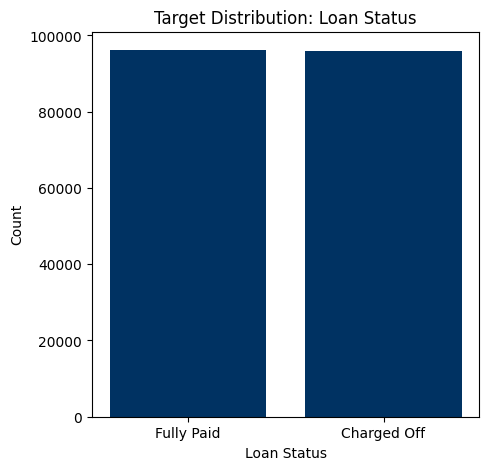

In [18]:
# Initialize subplot figure
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# Create histogram for ordinal readmission counts column
loan_status_counts = combined_train_data['loan_status'].value_counts().sort_index()
axs.bar(loan_status_counts.index.map({0: 'Fully Paid', 1: 'Charged Off'}), loan_status_counts, color='#003262')

axs.set_title('Target Distribution: Loan Status')
axs.set_xlabel('Loan Status')
axs.set_ylabel('Count')

plt.show()

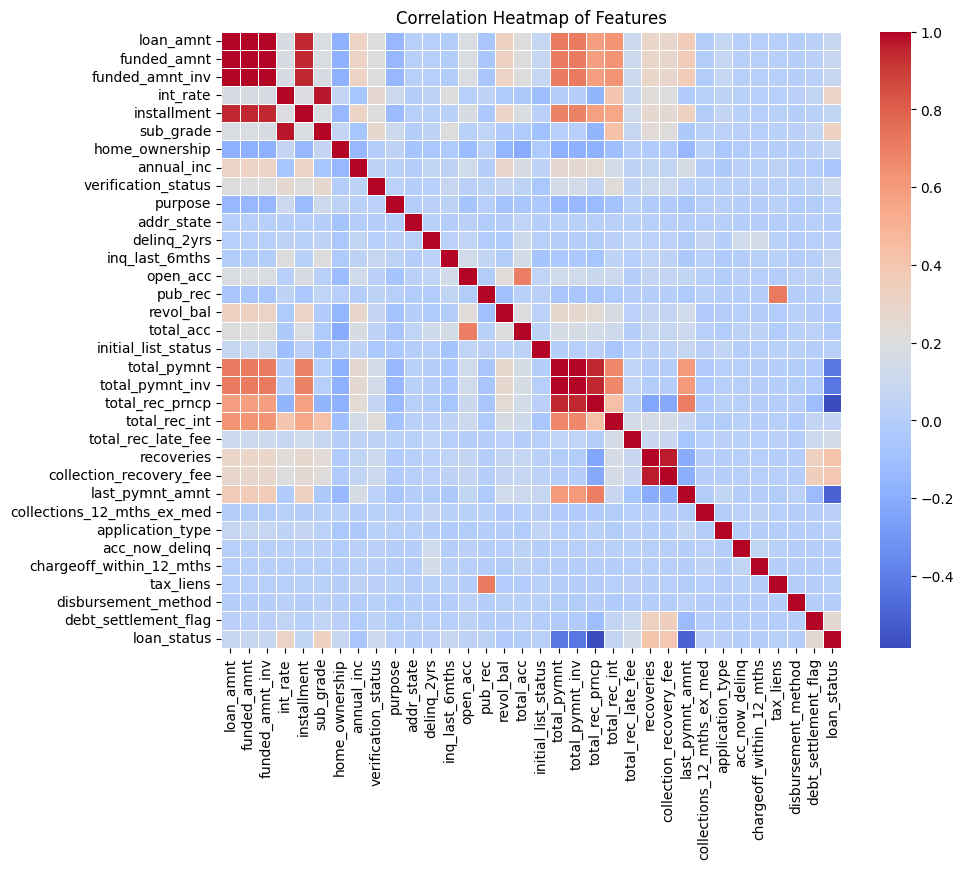

In [19]:
# Calculate correlation matrix
corr_matrix = combined_train_data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

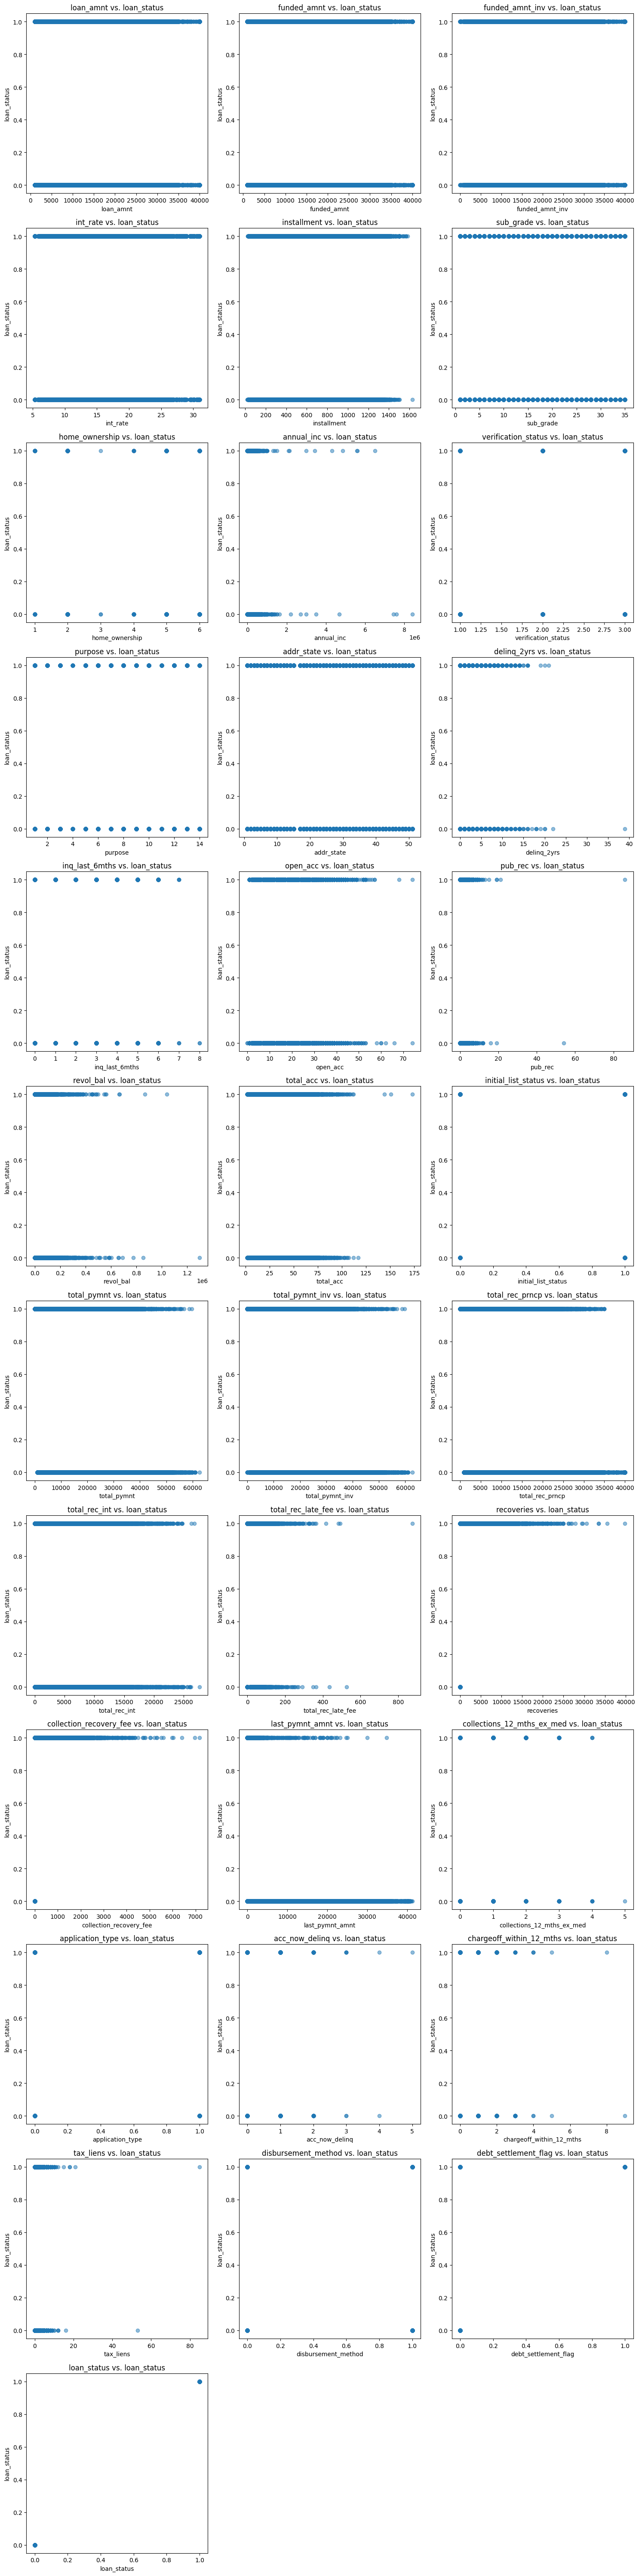

In [20]:
features = combined_train_data.columns 
target_variable = 'loan_status'

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_rows = int(np.ceil(num_features / 3))
num_cols = min(num_features, 3)

# Initialize subplot figure
fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))

if num_features == 1:
    axs = [axs]

for i, feature in enumerate(features):
    row = i // num_cols
    col = i % num_cols
    axs[row][col].scatter(combined_train_data[feature], combined_train_data[target_variable], alpha=0.5)
    axs[row][col].set_title(f'{feature} vs. {target_variable}')
    axs[row][col].set_xlabel(feature)
    axs[row][col].set_ylabel(target_variable)

for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axs[row][col].axis('off')

plt.tight_layout()
plt.show()
